<a href="https://colab.research.google.com/github/Saipradeep456/DATA-SCIENCE-TAINING-/blob/main/Predicting_the_house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error # Corrected the typo in the module name from 'metrcs' to 'metrics'
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Problem statement
 * you have ben give a dataset that describes the houses in Boston . now based on the given features , you have to predict the house price

# Creating a data frame


In [ ]:
boston = fetch_california_housing()
df = pd.DataFrame(boston.data)

# EDA -> exploratory data anlaysis

In [ ]:
df.head()

0     1         2         3       4         5      6       7
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25

# Adding columns

In [ ]:
df.columns = boston.feature_names

In [ ]:
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

# columns information
- MedInc - Median income in block group (scaled to tens of thousands)  
- HouseAge - Median house age in block group  
- AveRooms - Average number of rooms per household  
- AveBedrms - Average number of bedrooms per household  
- Population - Block group population  
- AveOccup - Average number of household members  
- Latitude - Block group latitude  
- Longitude - Block group longitude  
- Target (MedHouseVal) - Median house value (in $100,000s)  


In [ ]:
df['PRICE'] = boston.target

In [ ]:
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422

In [ ]:
df.tail()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  PRICE  
20635    -121.09  0.781  
20636    -121.21  0.771  
20637    -121.22  0.923  
20638    -121.32  0.847  
20639    -121.24  0.894

In [ ]:
df.shape

(20640, 9)

In [ ]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'PRICE'],
      dtype='object')

In [ ]:
df.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
PRICE         float64
dtype: object

In [ ]:
df.nunique()

MedInc        12928
HouseAge         52
AveRooms      19392
AveBedrms     14233
Population     3888
AveOccup      18841
Latitude        862
Longitude       844
PRICE          3842
dtype: int64

In [ ]:
df.nunique().sum()

74882

In [ ]:
df.isnull()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0       False     False     False      False       False     False     False   
1       False     False     False      False       False     False     False   
2       False     False     False      False       False     False     False   
3       False     False     False      False       False     False     False   
4       False     False     False      False       False     False     False   
...       ...       ...       ...        ...         ...       ...       ...   
20635   False     False     False      False       False     False     False   
20636   False     False     False      False       False     False     False   
20637   False     False     False      False       False     False     False   
20638   False     False     False      False       False     False     False   
20639   False     False     False      False       False     False     False   

       Longitude  PRICE  
0          False  False  
1          False  False  
2          False  False  
3          False  False  
4          False  False  
...          ...    ...  
20635      False  False  
20636      False  False  
20637      False  False  
20638      False  False  
20639      False  False  

[20640 rows x 9 columns]

In [ ]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

In [ ]:
df.describe()  # statical information


MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         PRICE  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

In [ ]:
df.corr()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
PRICE       0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

            Latitude  Longitude     PRICE  
MedInc     -0.079809  -0.015176  0.688075  
HouseAge    0.011173  -0.108197  0.105623  
AveRooms    0.106389  -0.027540  0.151948  
AveBedrms   0.069721   0.013344 -0.046701  
Population -0.108785   0.099773 -0.024650  
AveOccup    0.002366   0.002476 -0.023737  
Latitude    1.000000  -0.924664 -0.144160  
Longitude  -0.924664   1.000000 -0.045967  
PRICE      -0.144160  -0.045967  1.000000

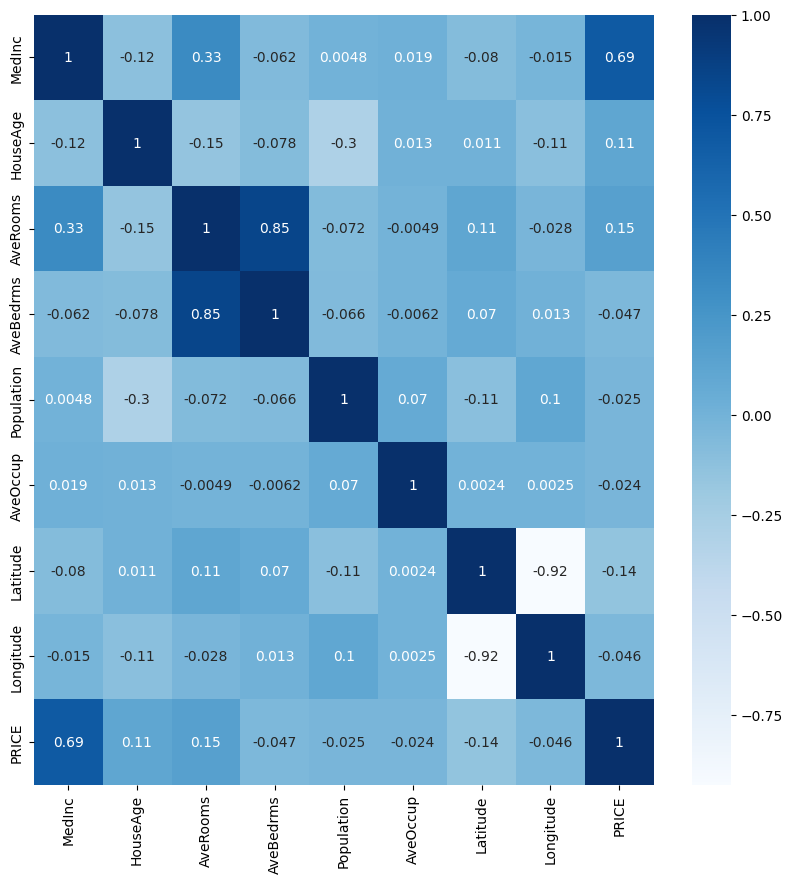

In [ ]:
plt.figure(figsize=(10,10)) # Changed from plt.figure(10,10)
sns.heatmap(data=df.corr(),annot=True,cmap='Blues')
plt.show()

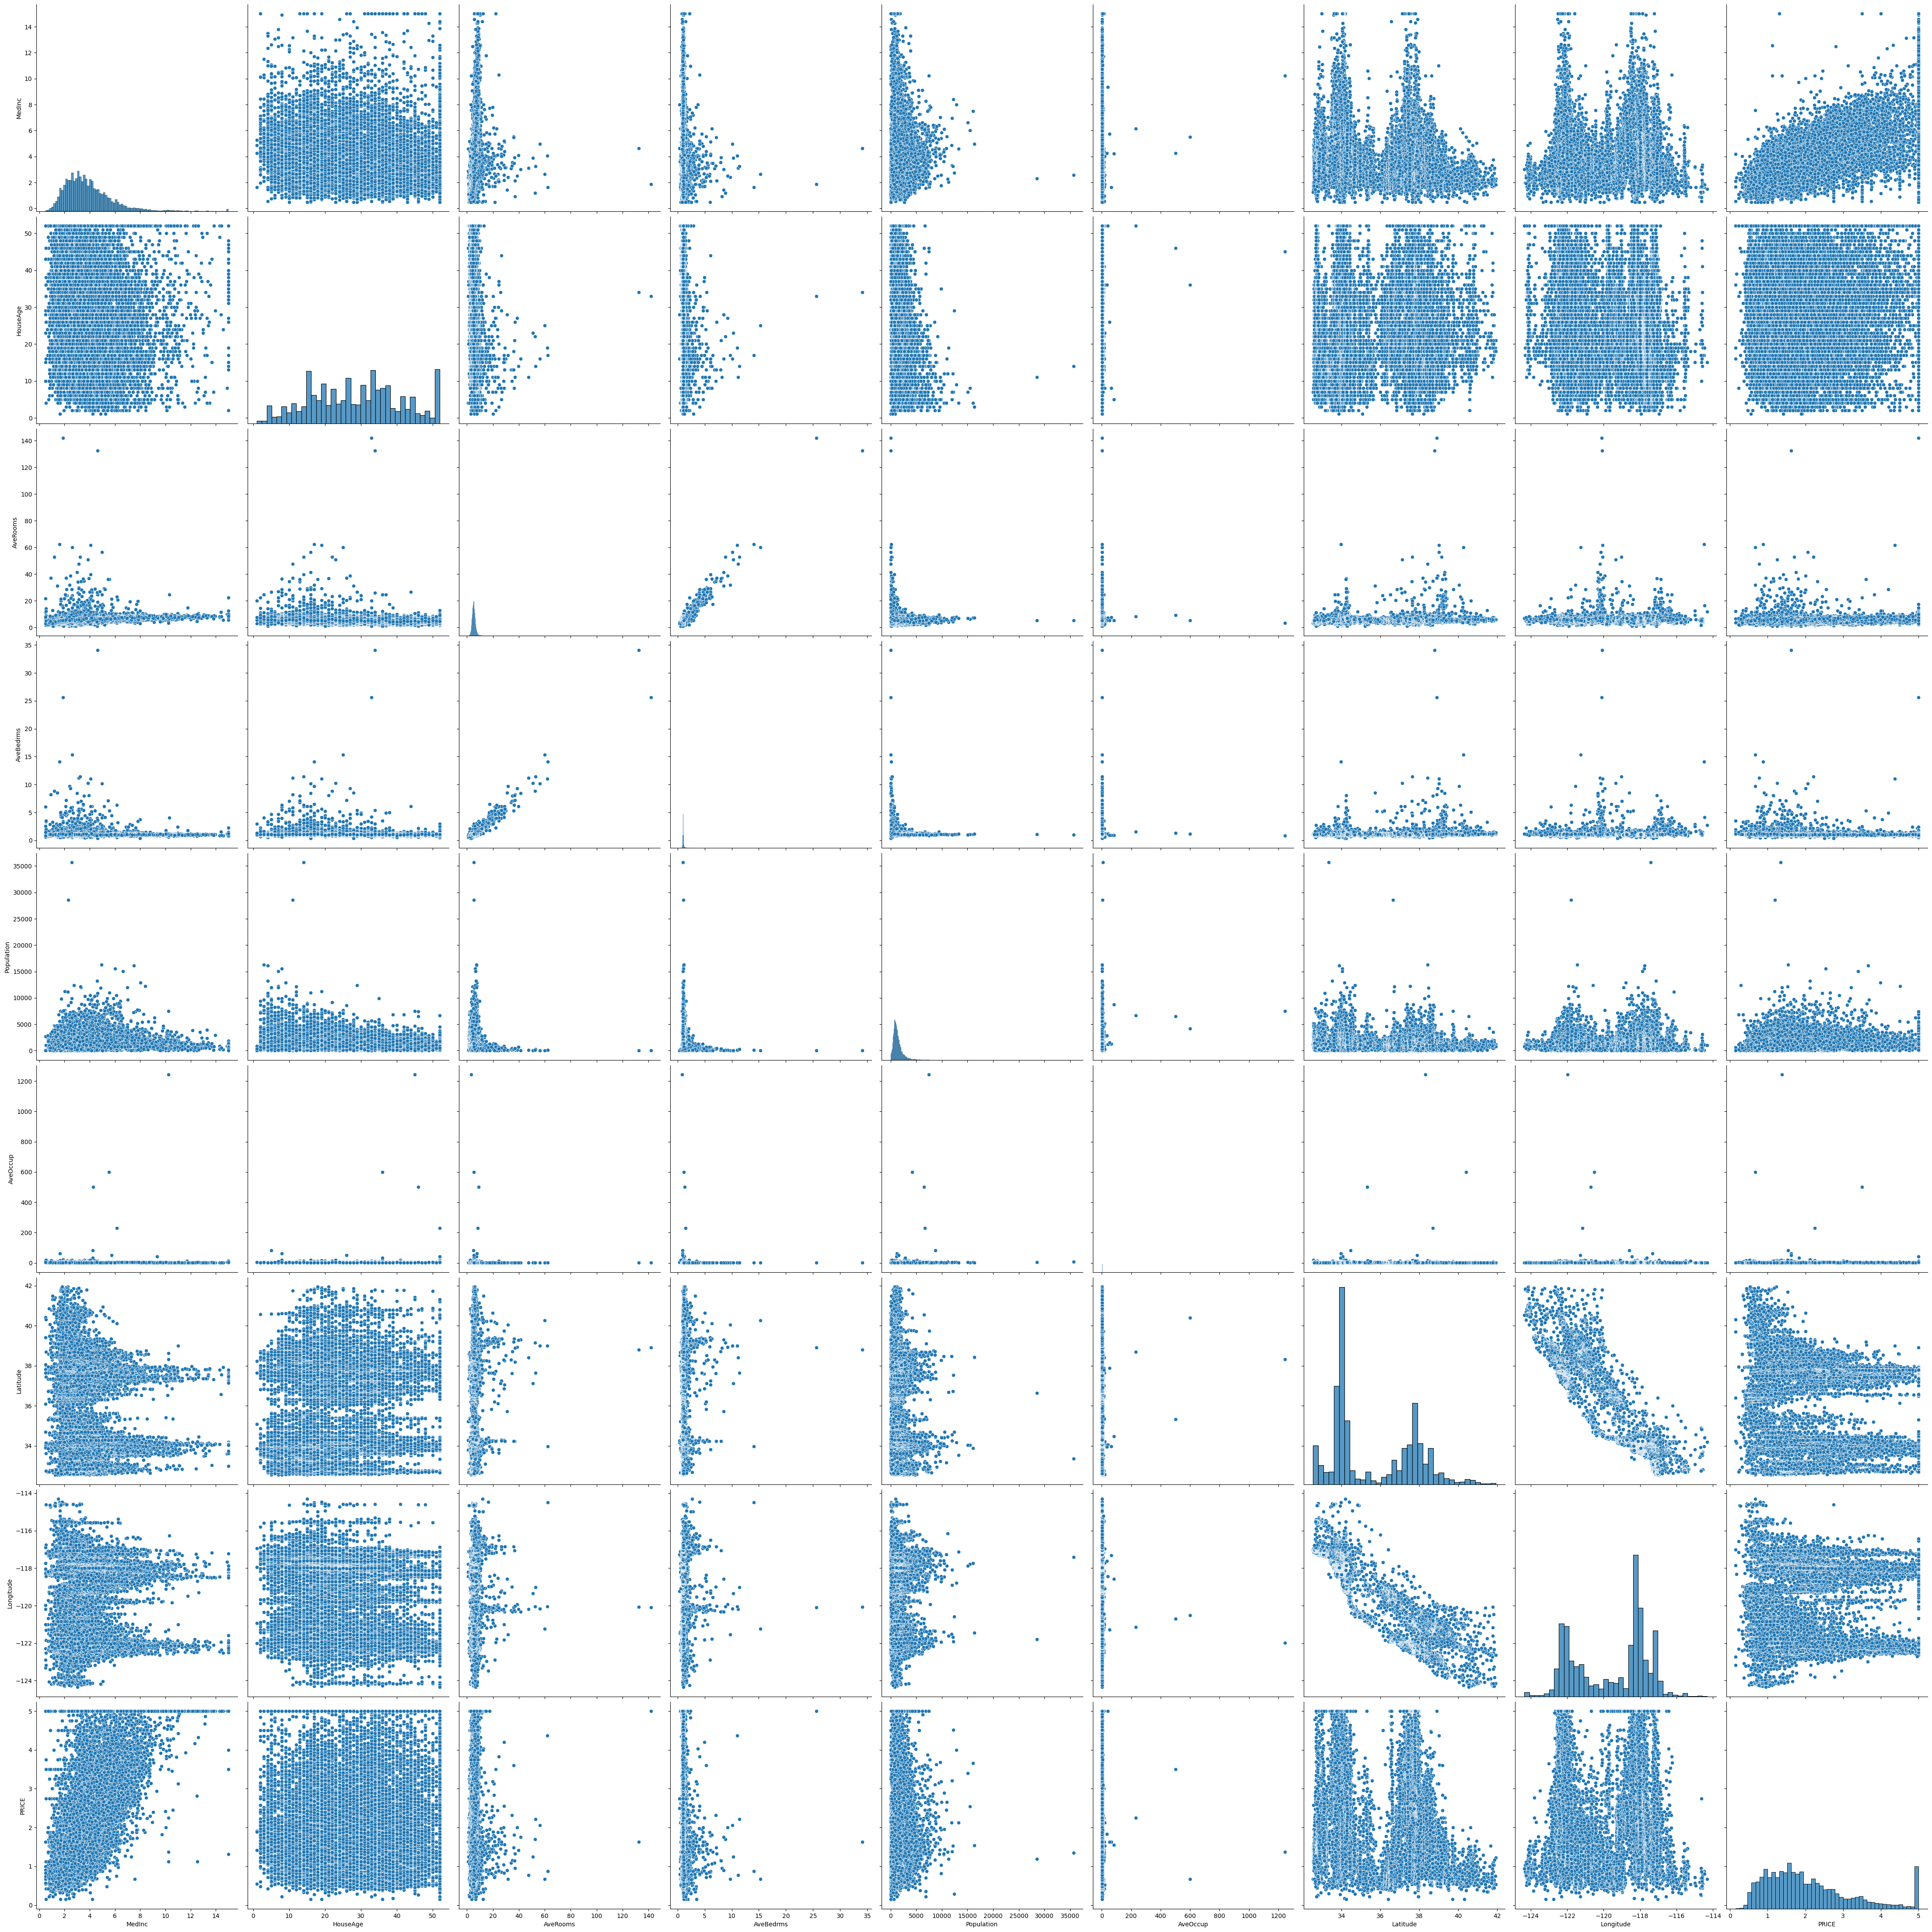

In [ ]:
sns.pairplot(df, height=5)  # Changed 'size' to 'height' and corrected the typo in the function name from 'pairlot' to 'pairplot'

<Axes: >

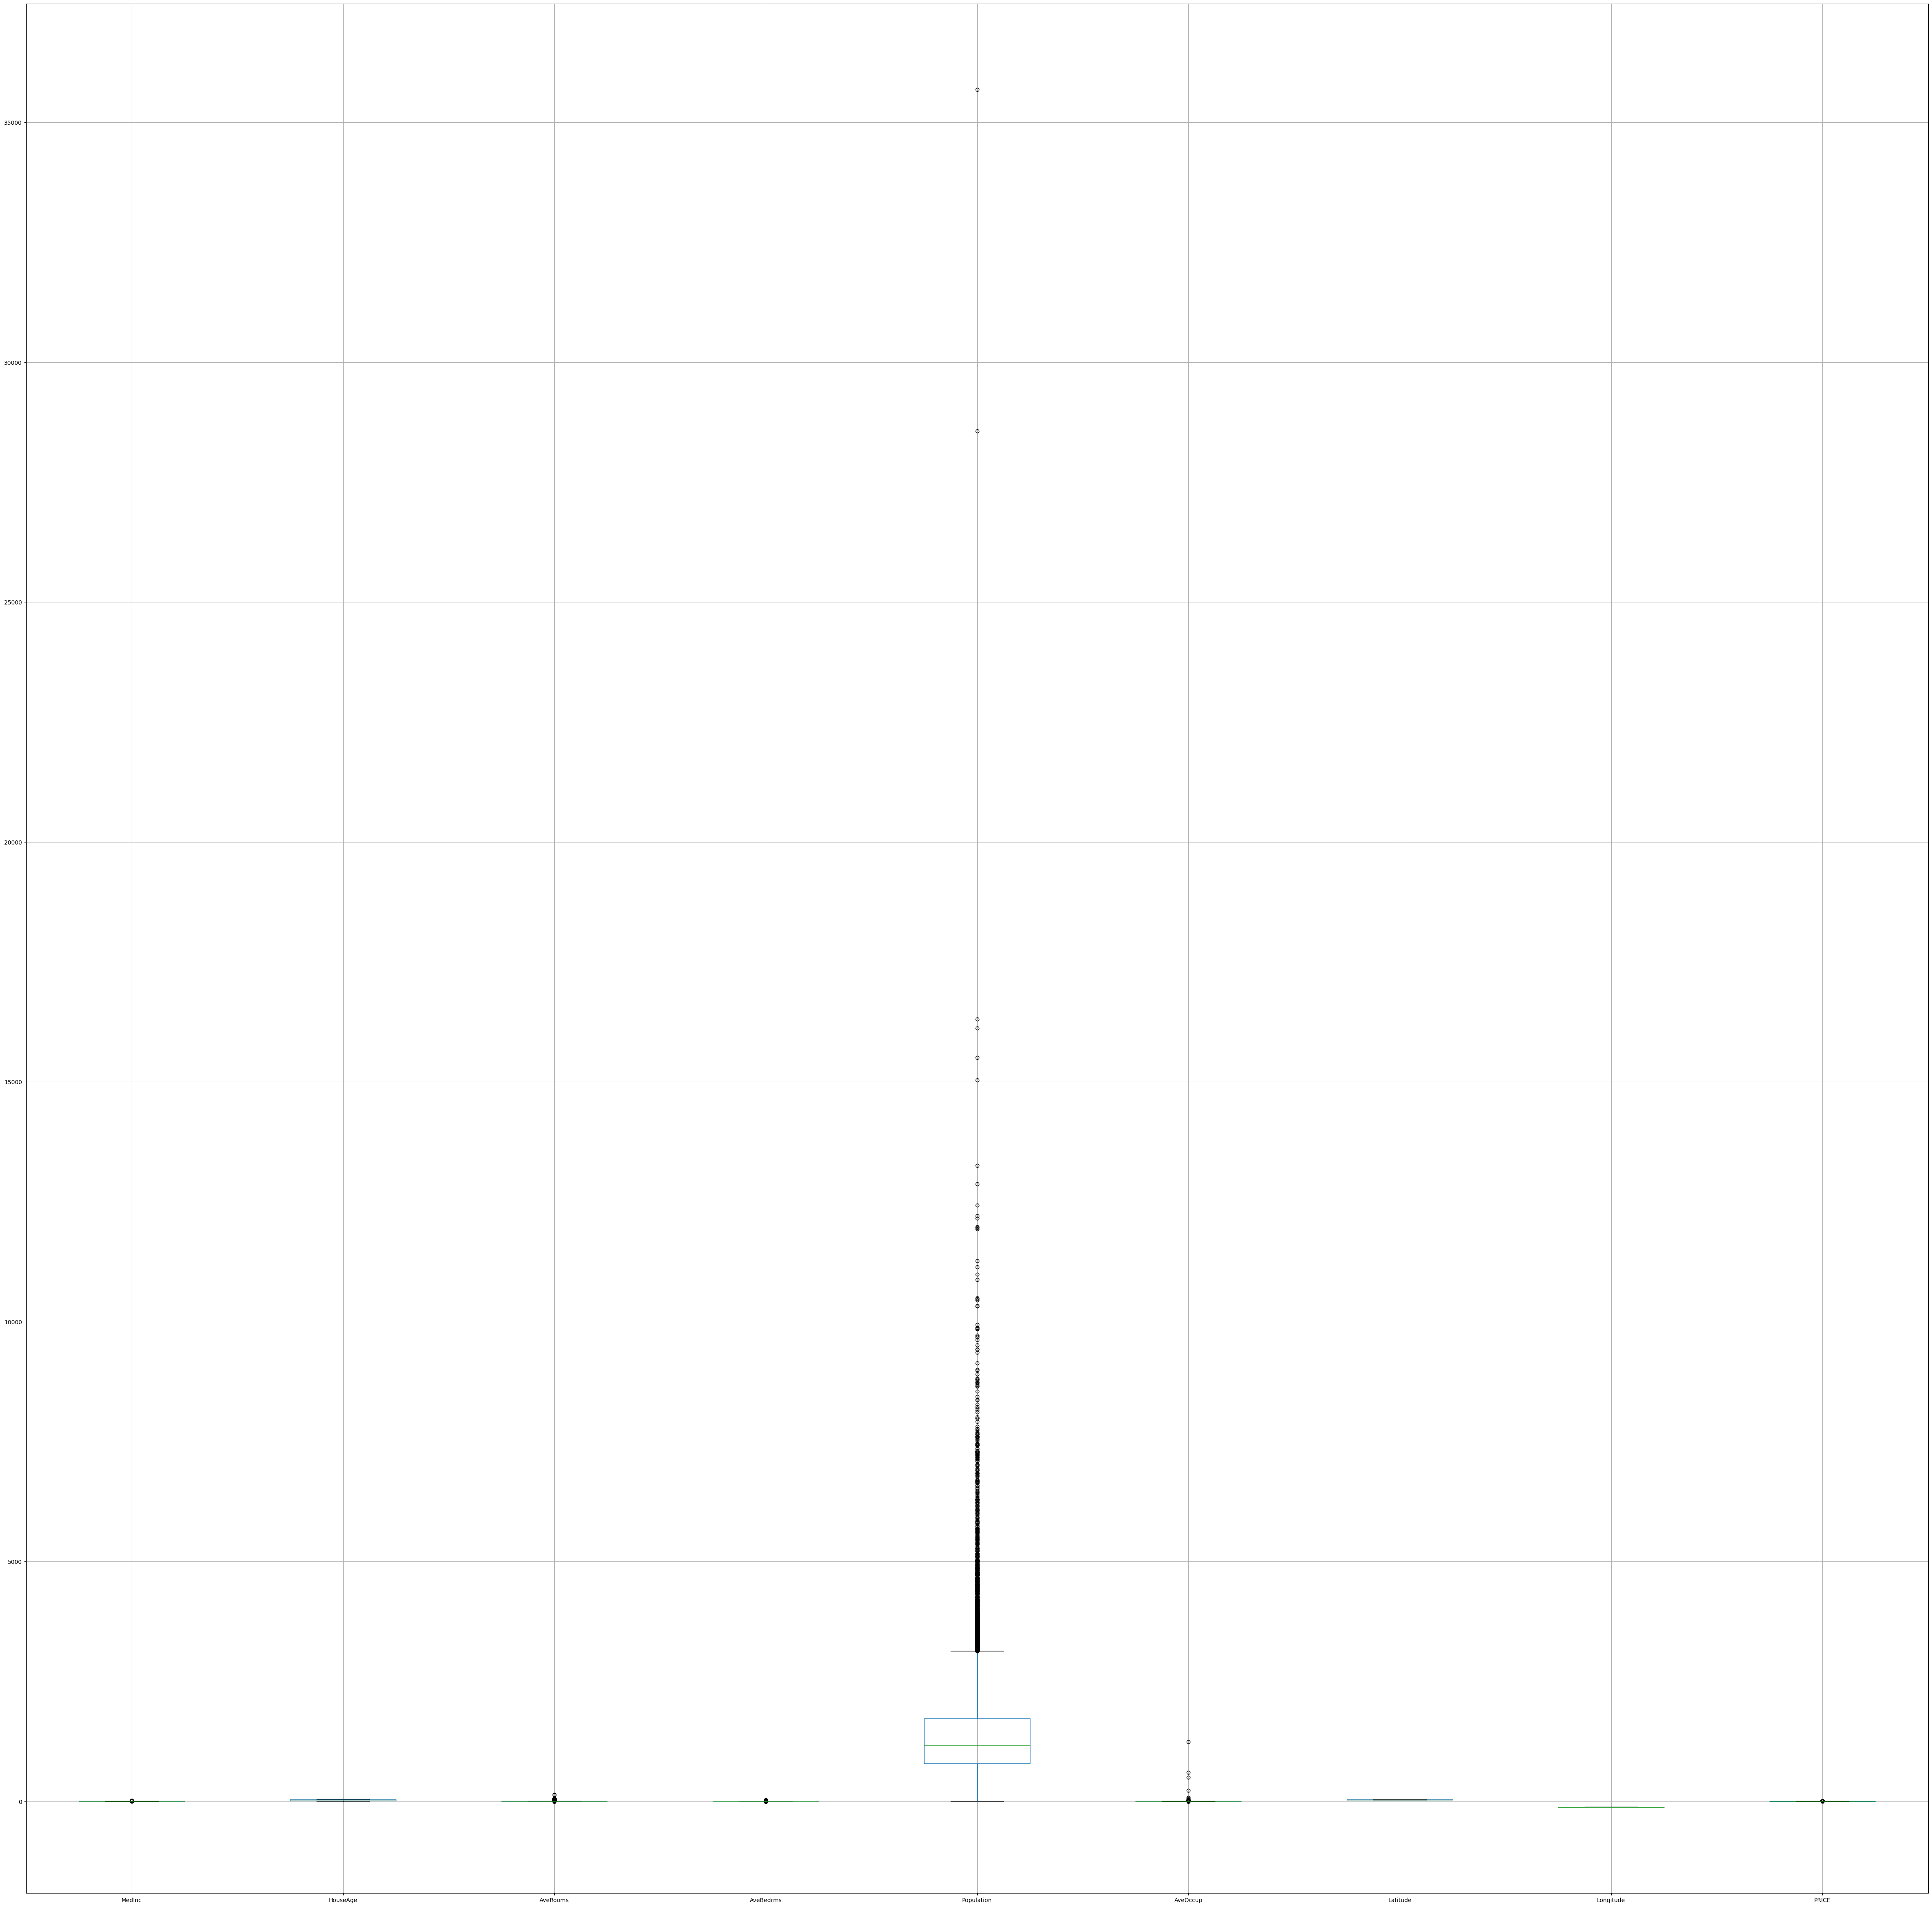

In [ ]:
# plot a Boxplot

plt.figure(figsize=(60,60))
df.boxplot()

In [ ]:
#minimum price
df.PRICE.min()

0.14999

In [ ]:
#maxmimum price
df.PRICE.max()

5.00001

In [ ]:
# Standard Deviation
df.PRICE.std()

1.1539561587441483

# Export the dataset

In [ ]:
df.to_csv('boston_dataset.csv',)

# Machine learning -> linear regression

In [ ]:
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422

In [ ]:
x =np.array (df.drop('PRICE',axis=1))
y = np.array(df.PRICE)

# x = boston.data

# y = boston.target

In [ ]:
x

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [ ]:
y


array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [ ]:
x.ndim

2

# splitting the data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,
                                                 random_state=42)

In [ ]:
len(x_train)

16512

In [ ]:
len(y_test)

4128

In [ ]:
len(x_test)

4128

In [ ]:
len(y_train)

16512

# Choosing the model

In [ ]:
model = LinearRegression()

# fitting/ train the model

In [ ]:
model.fit(x_train, y_train) # Changed 'x_tain' to 'x_train' to match the variable name defined earlier

LinearRegression()

In [ ]:
# intercept value
model.intercept_

-37.02327770606391

In [ ]:
# Coefficent value
model.coef_

array([ 4.48674910e-01,  9.72425752e-03, -1.23323343e-01,  7.83144907e-01,
       -2.02962058e-06, -3.52631849e-03, -4.19792487e-01, -4.33708065e-01])

# Prediction

In [ ]:
y_test

array([0.477  , 0.458  , 5.00001, ..., 5.00001, 0.723  , 1.515  ])

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

#  Testing the model performance

In [ ]:
model.score(x_test,y_test)

0.5757877060324524

In [ ]:
# R square
r2_score(y_test,y_pred )

0.5757877060324524

In [ ]:
# Adjusted R squared


In [ ]:
# MSE
mean_squared_error(y_test,y_pred)

0.5558915986952422

In [ ]:
# MAE
mean_absolute_error(y_test,y_pred)

0.533200130495698

In [ ]:
# RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

0.7455813830127749

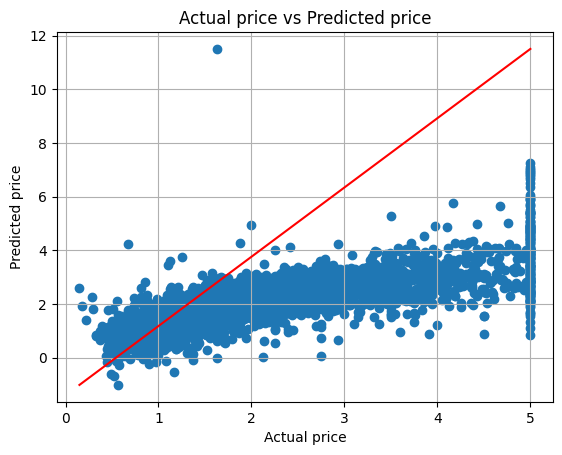

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.grid()
plt.plot([min(y_test),max(y_test)],[min(y_pred),max(y_pred)],color='red')
plt.title('Actual price vs Predicted price')

plt.show()

In [ ]:
pip install klib

# klib library - DEMO
# link :- https://pypi.org/project/klib/

*  importing, cleaning, analyzing and preprocessing data

In [ ]:
import klib
import pandas as pd
from sklearn.datasets import load_diabetes,load_iris

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/refs/heads/master/data/train.csv')

In [ ]:
df.columns = load_iris().feature_names

In [ ]:
df['cat']= load_iris().target

In [ ]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

GridSpec(6, 5)

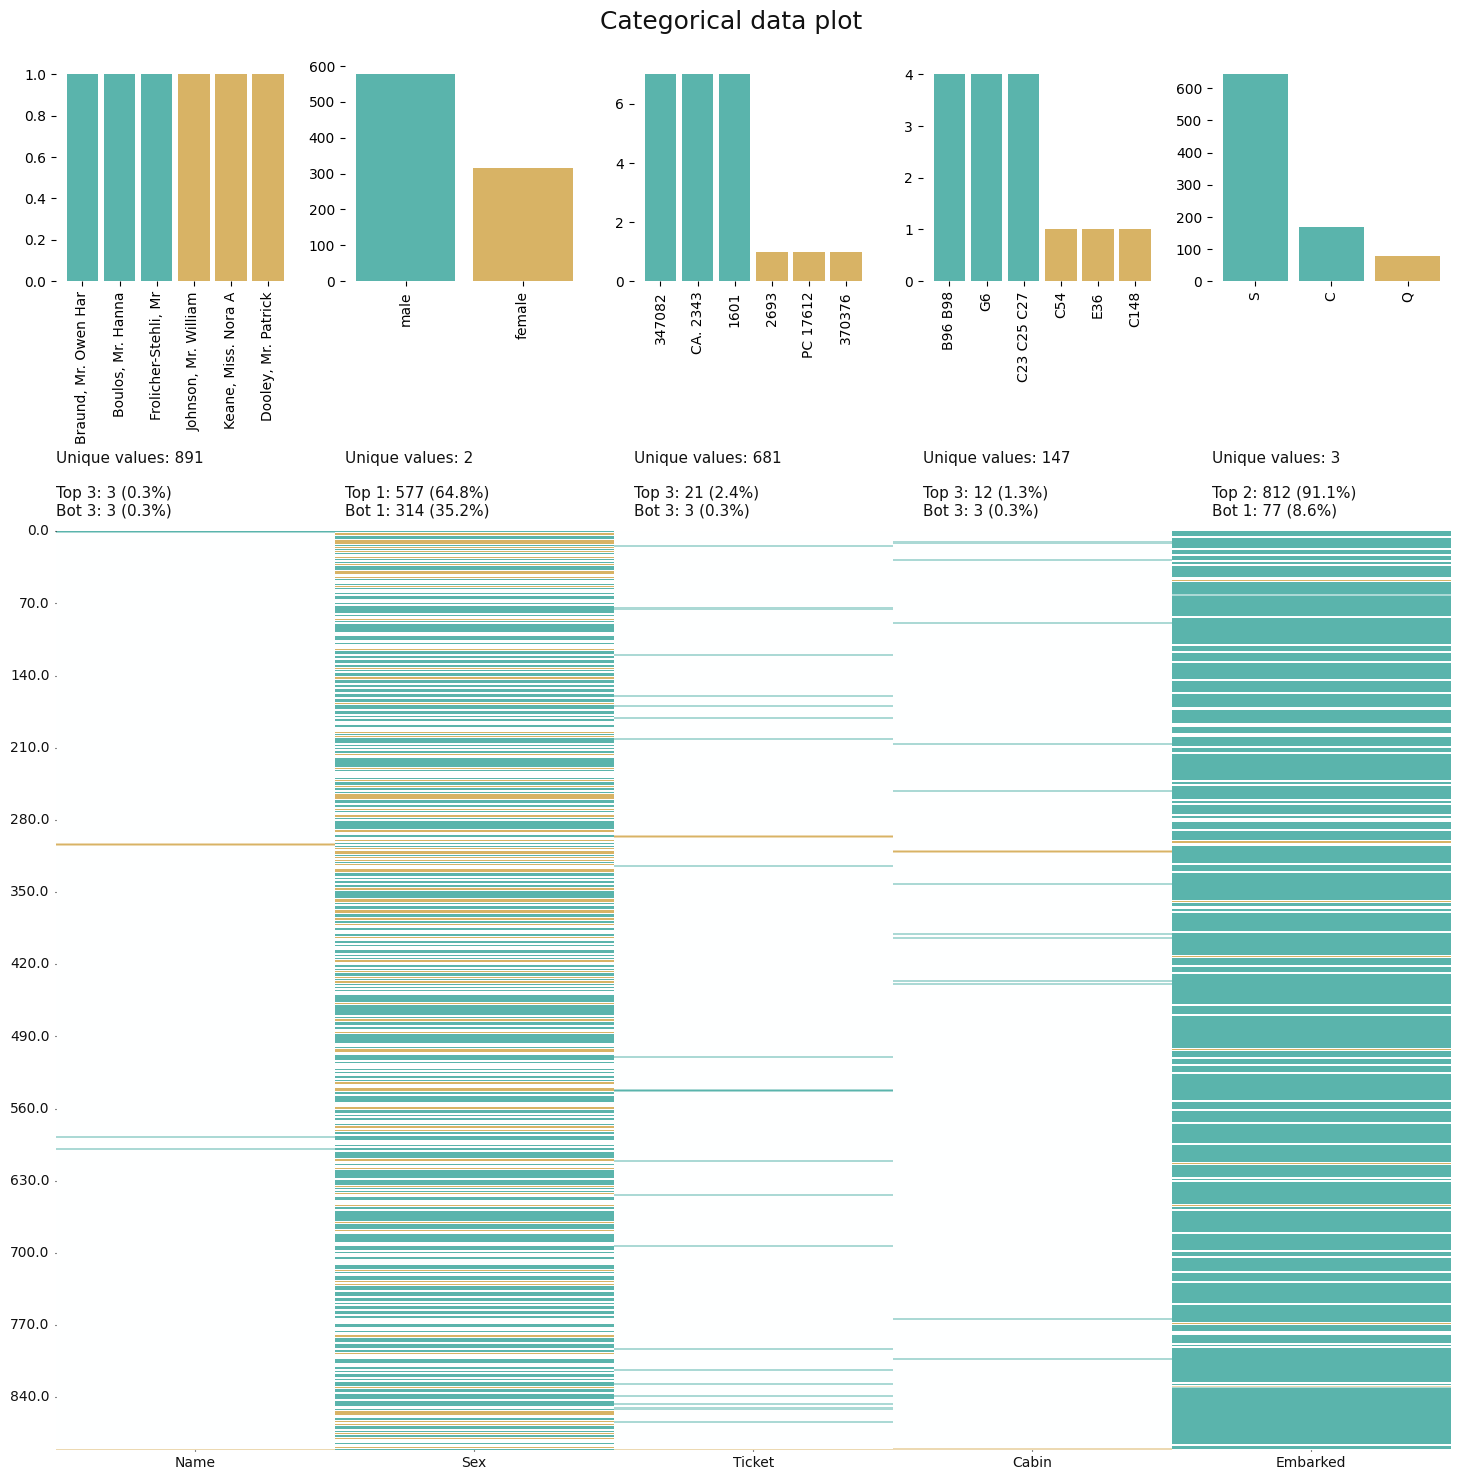

In [ ]:
# # klib.describe - functions for visualizing datasets
klib.cat_plot(df) # returns a visualization of the number and frequency of categorical features


In [ ]:
 klib.corr_mat(df) # returns a color-encoded correlation matrix


/usr/local/lib/python3.11/dist-packages/klib/describe.py:275: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  return corr.style.applymap(color_negative_red).format("{:.2f}", na_rep="-")


<Axes: title={'center': 'Feature-correlation (pearson)'}>

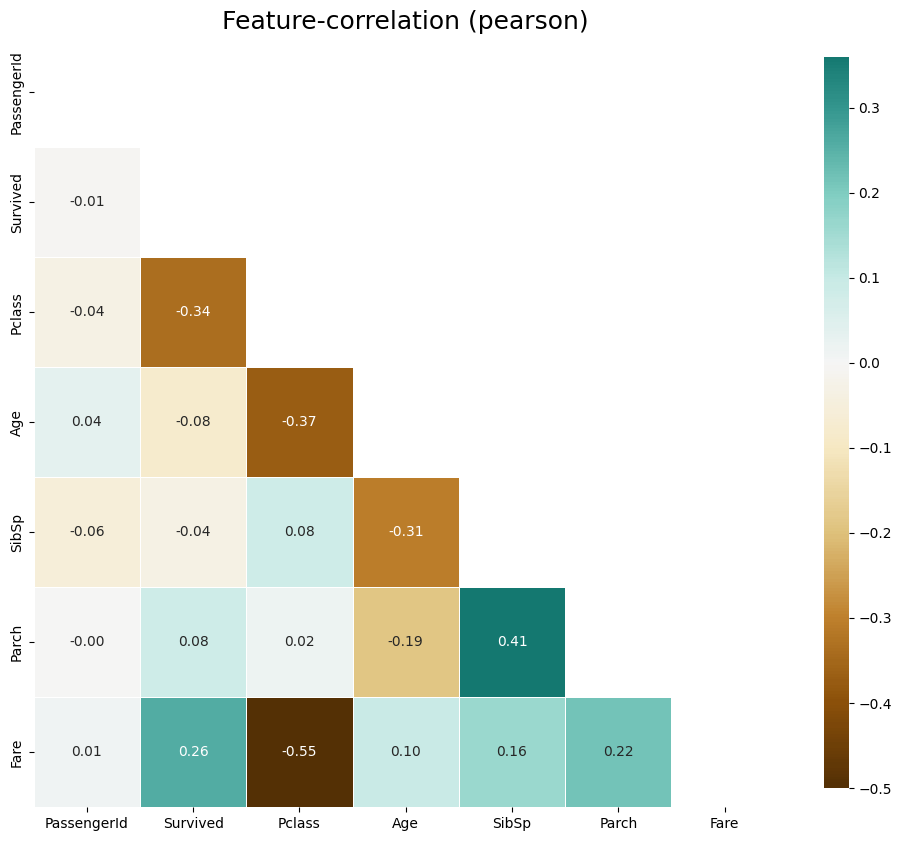

In [ ]:
klib.corr_plot(df) # returns a color-encoded heatmap, ideal for correlations
# - klib.corr_interactive_plot(df, split="neg").show() # returns an interactive correlation plot using plotly
# - klib.dist_plot(df) # returns a distribution plot for every numeric feature
# # - klib.missingval_plot(df) # returns a figure containing information about missing values

In [ ]:
klib.corr_interactive_plot(df, split="neg").show() # returns an interactive correlation plot using plotly


Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<Axes: xlabel='Fare', ylabel='Density'>

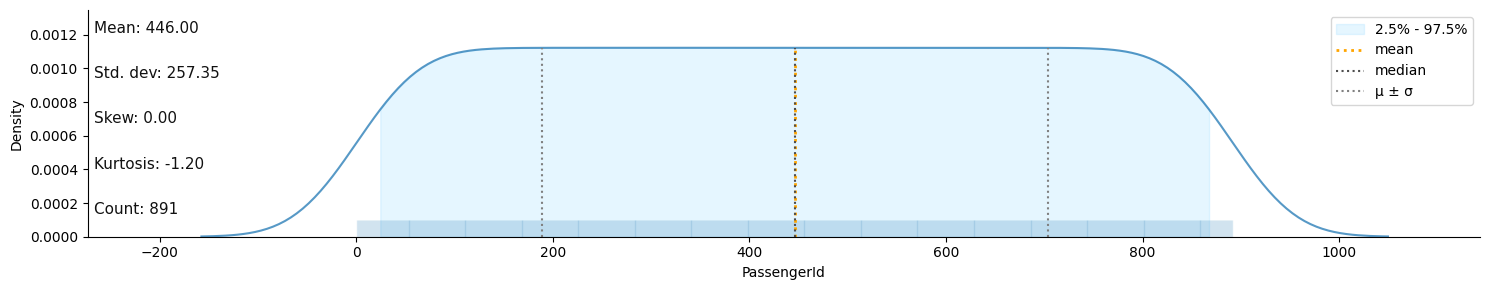

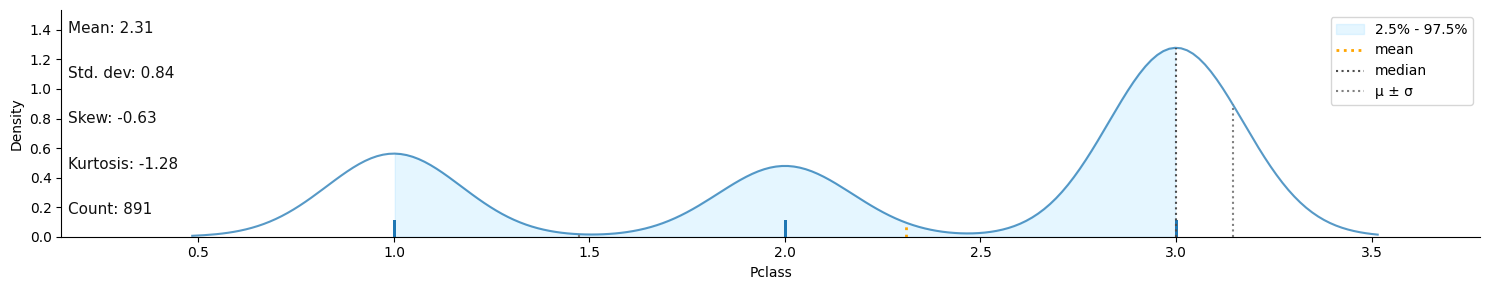

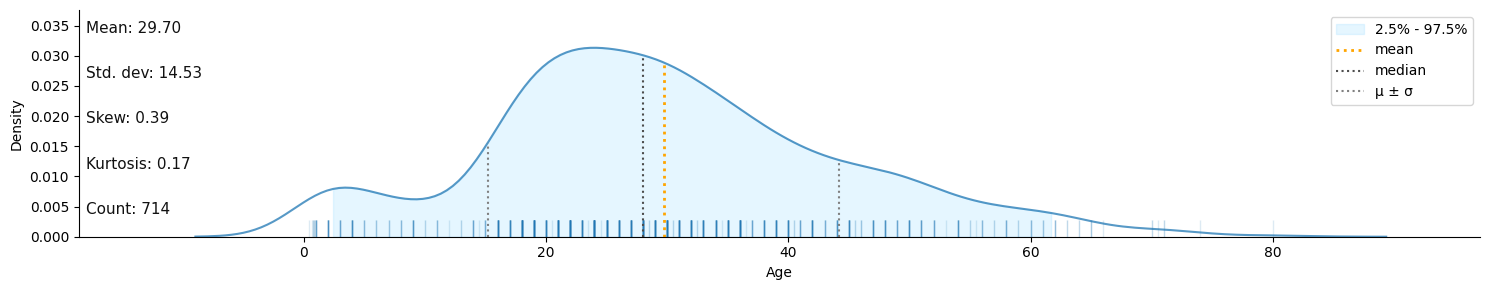

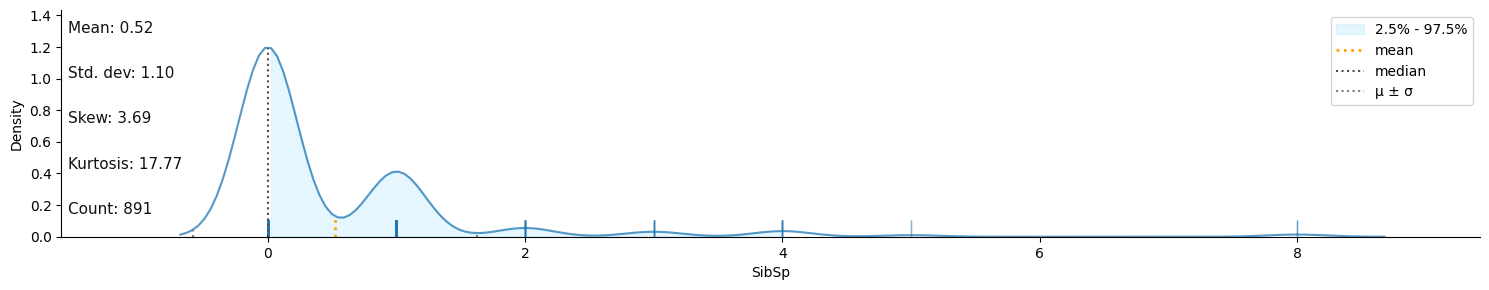

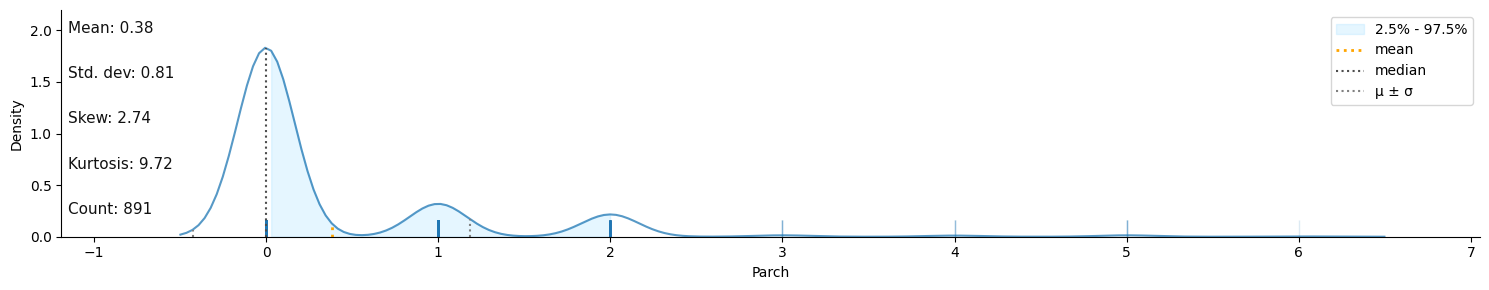

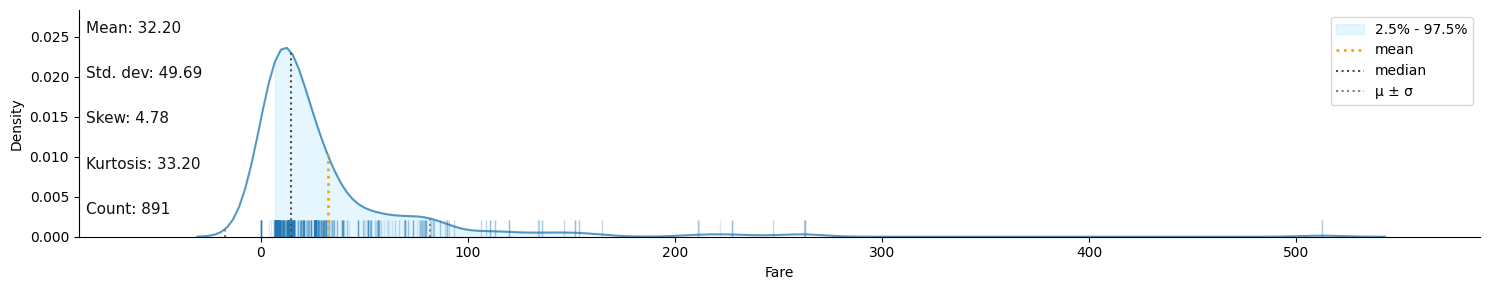

In [ ]:
klib.dist_plot(df) # returns a distribution plot for every numeric feature


GridSpec(6, 6)

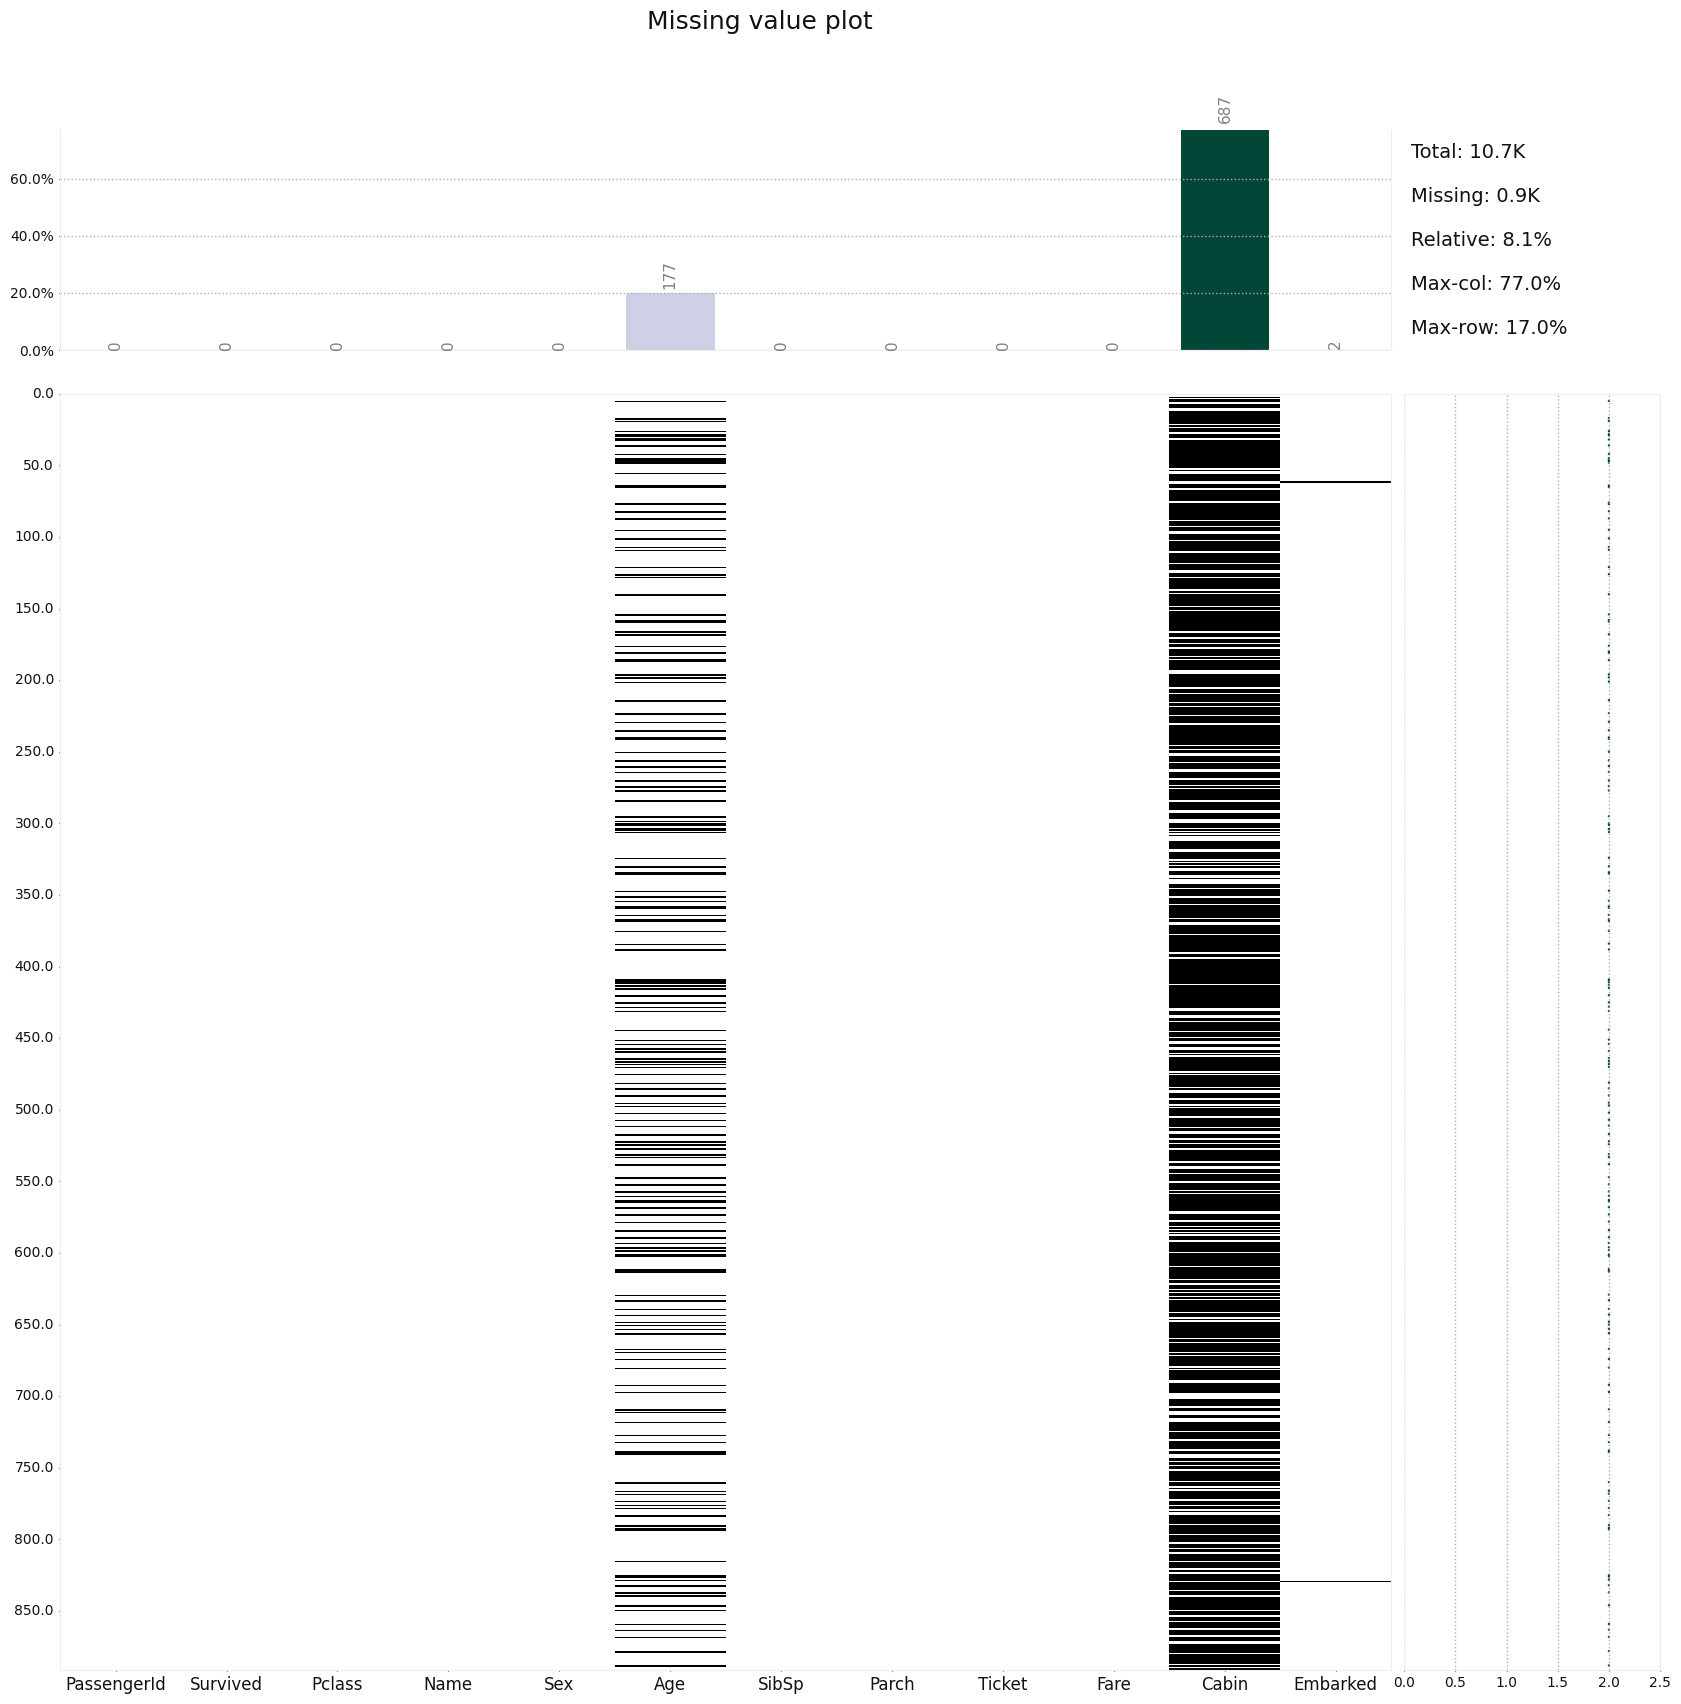

In [ ]:
 klib.missingval_plot(df) # returns a figure containing information about missing values